## 0. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


## 1. Loading of the dataset

In [2]:
# Generate data
# noise=0.15 adds some messiness to make it realistic
X, y = make_moons(noise=0.15, random_state=42)

## 2. Preparation of the dataset

In [3]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Definition of the model

In [4]:
# Train model
# Pipeline: Scales data first, then fits the SVM model
# kernel='rbf': Allows curved boundaries (instead of just straight lines)
# C=1.0: Trade-off between correct classification and a smooth boundary
# gamma=0.5: Controls how "curvy" the boundary is (higher = more complex curves)
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma=0.5))
model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.5


## 4. Evaluation of the model

In [5]:
# Evaluate
print(f"Accuracy: {model.score(X_test, y_test):.2f}")

Accuracy: 1.00


## 5. Presentation of results

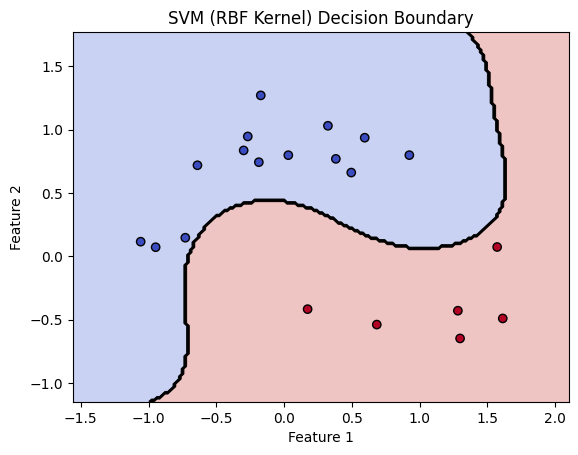

In [6]:
# Visualize Decision Boundary
def plot_boundary(model, X, y):
    # Create a grid of points covering the data range
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02 # Mesh step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for every point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot filled contours (background)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    # Plot boundary line
    plt.contour(xx, yy, Z, alpha=0.8, colors='k', linewidths=1)
    
    # Plot actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM (RBF Kernel) Decision Boundary")
    plt.show()

plot_boundary(model, X_test, y_test)